In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

In [3]:
# TESS = 788.7781855
# ZTF-r = 646.375
# LT = 615.8435393
# ZTF-g = 482.950
# PTO = 471.8872246
# WHT = 356.5647932
# NUV = 244.60698626444548
# NUV (2550 - 2950) = 278.9703445161371
# NUV (2150 - 2550) = 235.8028267307681
# NUV (1630 - 2150) = 195.76162964730503
# FUV = 135.89896930381835
# FUV (1520 - 1715) = 159.3242206252428
# FUV (1330 - 1520) = 141.1094441960065
# FUV (1120 - 1330) = 125.81681569145482


wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503, 135.89896930381835,\
                        159.3242206252428, 141.1094441960065, 125.81681569145482])*1e-9

Star_test = planck(wavelengths, 7510)

wavelengths2 = np.linspace(1e-7, 1e-6, 1000) 

Star = planck(wavelengths2, 7510)


<Figure size 432x288 with 0 Axes>

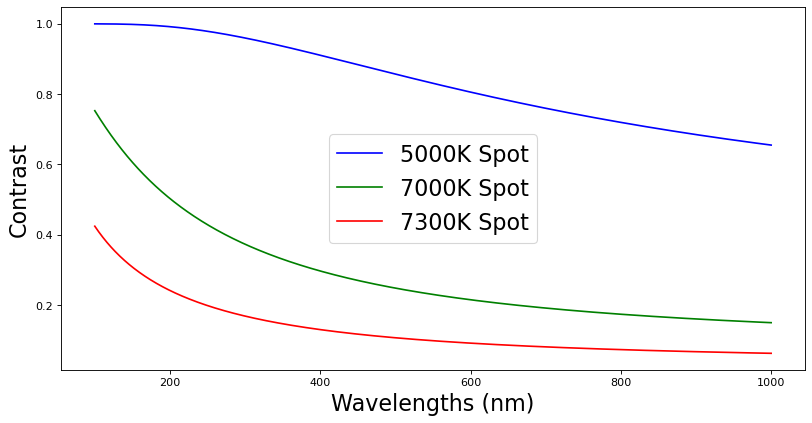

In [4]:
Spot_6500 = planck(wavelengths2, 5000)
Spot_7300 = planck(wavelengths2, 7300)
Spot_5000 = planck(wavelengths2, 7000)

c_6500 = 1 - (Spot_6500 / Star)
c_7300 = 1 - (Spot_7300 / Star)
c_5000 = 1 - (Spot_5000 / Star)

plt.figure()
figure(figsize=(12, 6), dpi=80)
plt.plot(wavelengths2*1e9, c_6500 , 'b-', label='5000K Spot')
plt.plot(wavelengths2*1e9, c_5000 , 'g-', label='7000K Spot')
plt.plot(wavelengths2*1e9, c_7300 , 'r-', label='7300K Spot')
plt.xlabel('Wavelengths (nm)', size=20)
plt.ylabel('Contrast', size=20)
plt.legend(fontsize=20)
plt.show()

\begin{equation} \label{eq1}
\begin{split}
\LARGE
contrast & = \LARGE \frac{I_{star} - I_{spot}}{I_{star}} \\
 & = \LARGE 1 - \frac{I_{spot}}{I_{star}}
\end{split}
\end{equation}

\begin{equation}
\LARGE
I = \LARGE Intensity
\end{equation}


In [5]:
def find_temp(contrast, wavelengths):
    
    temperatures = np.linspace(5510, 7510, 2001, endpoint=True, dtype=int)
    
    Star_test = planck(wavelengths, 7510)

    min_res = (10e100)
    
    for temp in temperatures:
        
        Spot_test = planck(wavelengths, temp)
        
        c_test = 1 - (Spot_test / Star_test)
        
        res = np.sum((c_test - contrast)**2)
        
        if res <= min_res:
            min_res = res
            best_temp = temp
    
    Spot_best = planck(wavelengths2, best_temp)
    
    c_best = 1  - (Spot_best / Star)
            
    return best_temp, c_best

# 30 Degrees

In [6]:
contrast = np.array([0.04618, 0.05509, 0.06984, 0.08973, 0.10118, 0.12773, 0.23164, 0.21885, 0.28845, 0.20529, 0.73682,\
                     0.49299, 0.85734, 0.99324])

In [9]:
temp_30, contrast_30 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

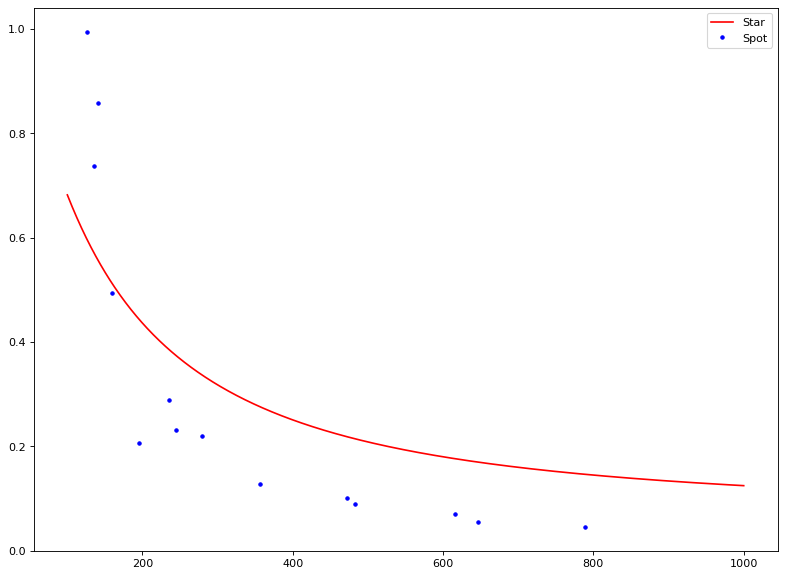

In [10]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_30, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [11]:
temp_30

7087

In [12]:
contrast = np.array([0.04618, 0.05509, 0.06984, 0.08973, 0.10118, 0.12773])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

In [13]:
temp_30, contrast_30 = find_temp(contrast, wavelengths)

In [14]:
temp_30

7340

# 35 Degrees

In [60]:
contrast = np.array([0.04598, 0.0512, 0.06449, 0.08323, 0.09434, 0.11743, 0.21353, 0.20186, 0.26473, 0.18969, 0.6573,\
                     0.44579, 0.76041, 0.99196])

In [61]:
temp_35, contrast_35 = find_temp(contrast)

<Figure size 432x288 with 0 Axes>

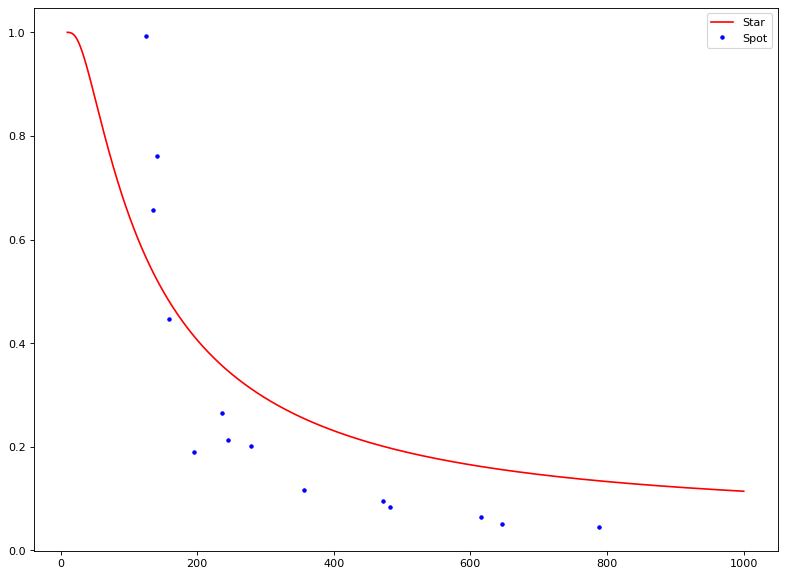

In [62]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_35, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [63]:
temp_35

7123.0

# 40 Degrees

In [64]:
contrast = np.array([0.04154, 0.04585, 0.05769 ,0.07444, 0.08435, 0.10479, 0.1899, 0.17965, 0.23492, 0.16888, 0.57465,\
                     0.39317, 0.66251, 0.97878])

In [65]:
temp_40, contrast_40 = find_temp(contrast)

<Figure size 432x288 with 0 Axes>

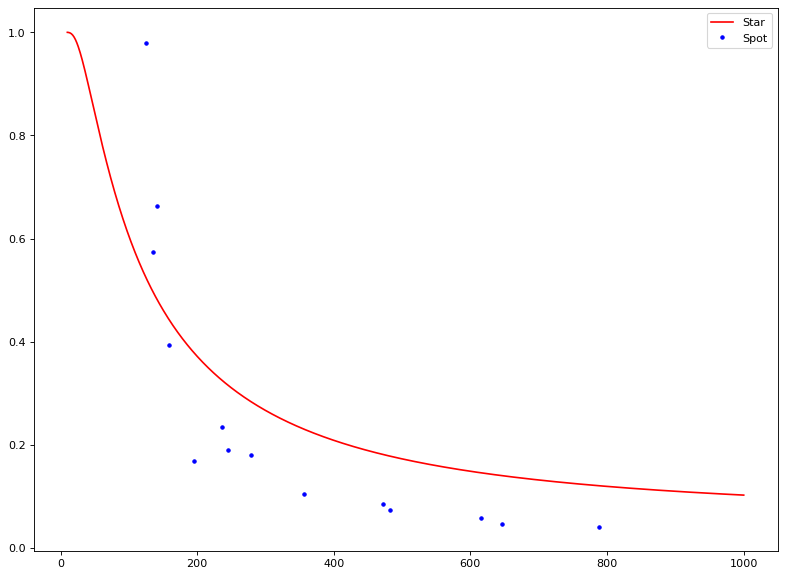

In [66]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_40, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [67]:
temp_40

7163.0

# 45 Degrees

In [56]:
contrast = np.array([0.04899, 0.05314, 0.06663, 0.08586, 0.09746, 0.11978, 0.21508, 0.2038, 0.26399, 0.19201, 0.60971,\
                     0.42923, 0.69243, 0.98045])

In [57]:
temp_45, contrast_45 = find_temp(contrast,wavelengths)

<Figure size 432x288 with 0 Axes>

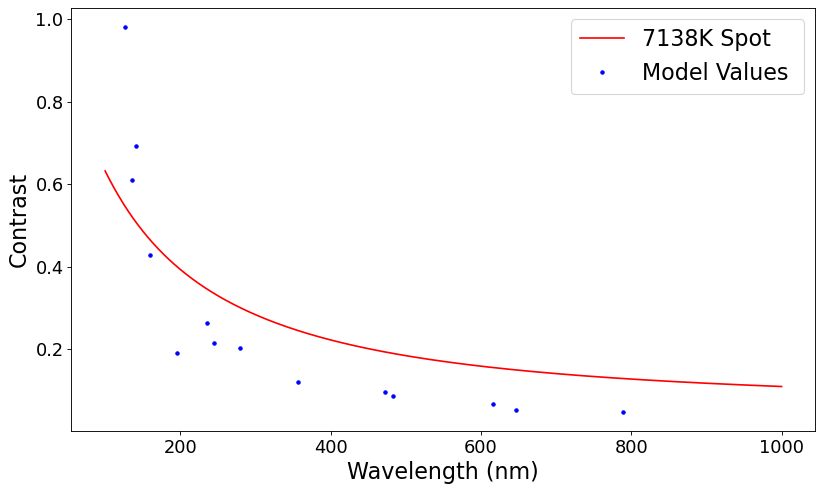

In [58]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_45, 'r-', label=str(temp_45)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [59]:
temp_45

7138

In [60]:
wavelengths3 = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932,\
                        244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503,])*1e-9

In [61]:
contrast2 = np.array([0.04899, 0.05314, 0.06663, 0.08586, 0.09746, 0.11978,\
                     0.21508, 0.2038, 0.26399, 0.19201])

In [62]:
temp_45_2, contrast_45_2 = find_temp(contrast2, wavelengths3)

<Figure size 432x288 with 0 Axes>

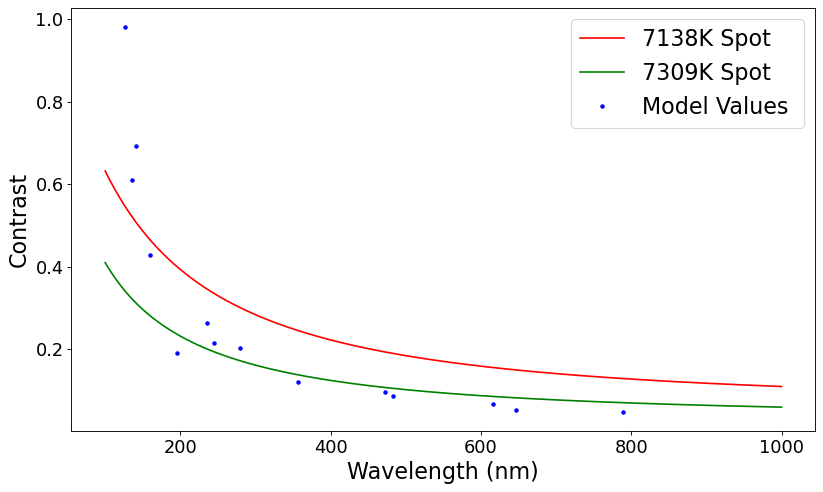

In [64]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_45, 'r-', label=str(temp_45)+'K Spot') 
plt.plot(wavelengths2*1e9, contrast_45_2, 'g-', label=str(temp_45_2)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [54]:
temp_45

7309

# Test - 6510K

In [9]:
S_test = planck(wavelengths2, 6510)

con_test = 1  - (S_test / Star)

<Figure size 432x288 with 0 Axes>

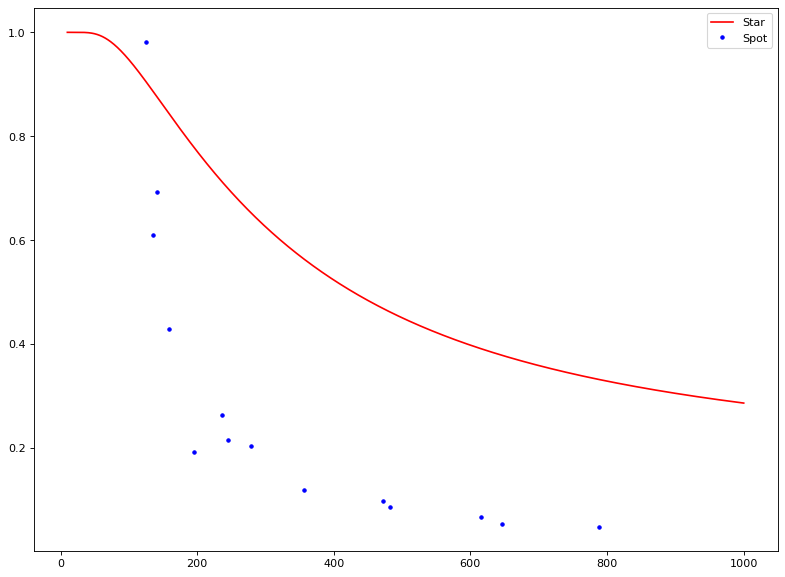

In [10]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, con_test, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

# Test - 7300K

In [25]:
S_test = planck(wavelengths2, 7300)

con_test = 1  - (S_test / Star)

<Figure size 432x288 with 0 Axes>

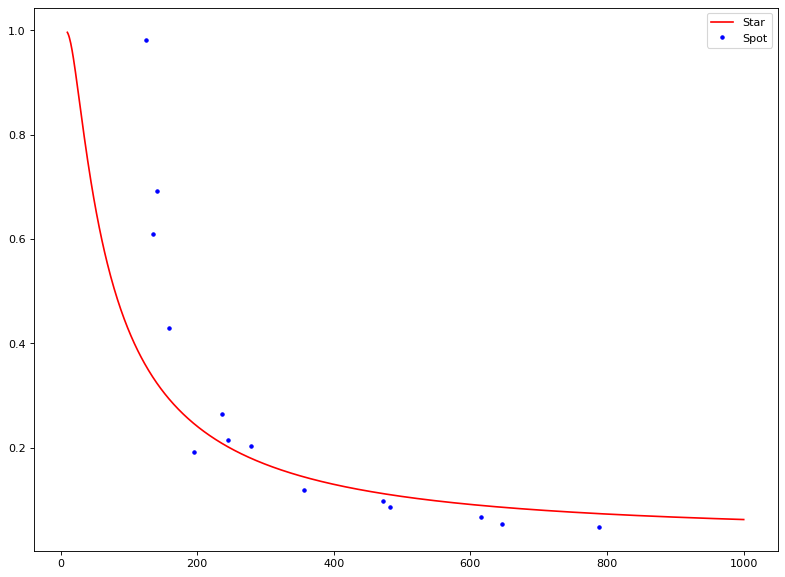

In [26]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, con_test, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [65]:
contrast = np.array([0.0952,
0.10206,
0.126,
0.15918,
0.17861,
0.21404,
0.35056,
0.33578,
0.41138,
0.31977,
0.72555,
0.58202,
0.77972,
0.94479])

In [66]:
temp_45, contrast_45 = find_temp(contrast,wavelengths)

<Figure size 432x288 with 0 Axes>

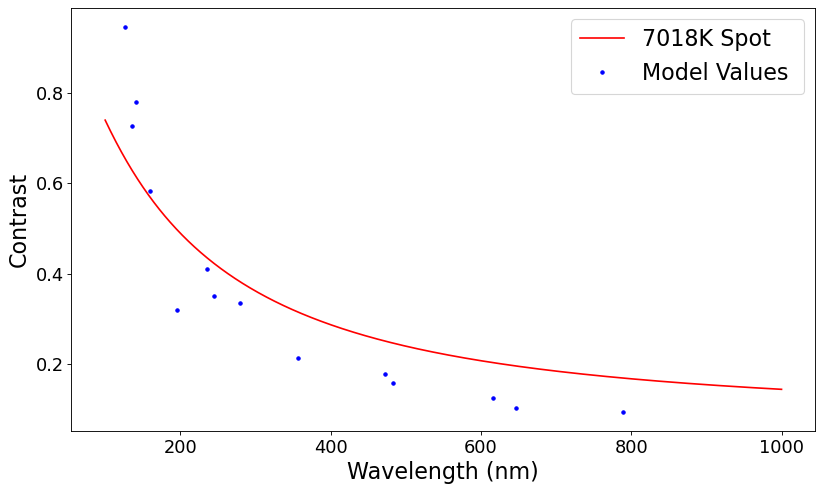

In [67]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_45, 'r-', label=str(temp_45)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()